# 1) (a ) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random


In [4]:
def sigmoid(z):       # defining the sugmoid function .
    val = 1/(1 + np.exp(-z))
    return val


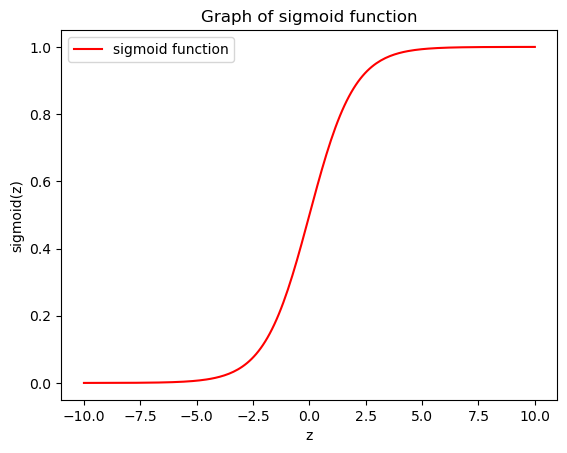

In [5]:
x = np.linspace(-10, 10, 200)

sgm_val = np.zeros(len(x))
i = 0
for ele in x:
    sgm_val[i] =sigmoid(ele)
    i += 1

plt.plot(x, sgm_val, color = 'red', label = 'sigmoid function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Graph of sigmoid function')
plt.legend()
plt.show()


# The interpretation on why sigmoid function is useful for a classification problem.

The sigmoid function is useful for classification problems because it maps input values to a probability score between 0 and 1, making it easy to interpret as the probability of belonging to a certain class. Its smoothness allows for efficient training with gradient-based optimization algorithms, and its non-linearity helps capture complex relationships in the data. Additionally, it's commonly used in logistic regression, a popular technique for binary classification.


# (b) Plot the log functions in the cost function individually. Print your interpretation of the log functions



In [6]:
def cost_fun_y_1(w):    # defining the cost function .
    val = -np.log(w)
    return val


def cost_fun_y_0(w):
    val = -np.log(1- w)
    return val


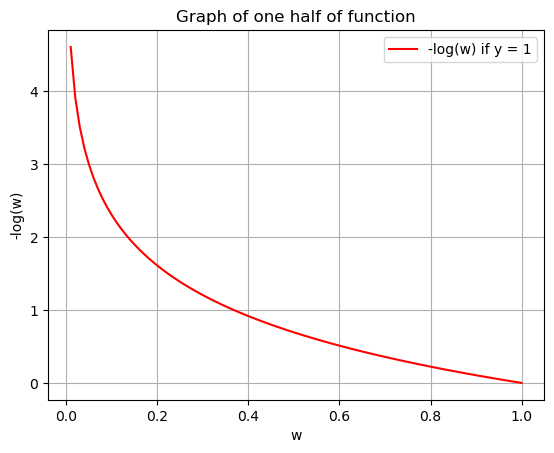

In [113]:
eps = 10e-3
z = np.linspace(eps, 1, 100)

cost_y_1 = np.zeros(len(z))
cost_y_1 = cost_fun_y_1(z)

plt.plot(z, cost_y_1, color = 'red', label = '-log(w) if y = 1')
plt.xlabel('w')
plt.ylabel('-log(w)')
plt.title('Graph of one half of function')
plt.legend()
plt.grid(True)
plt.show()


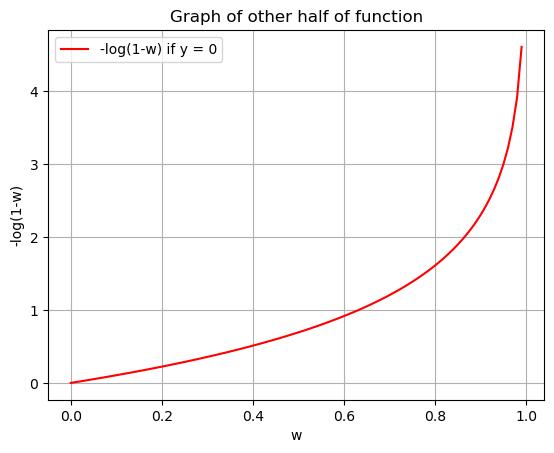

In [114]:
eps = 10e-3
z = np.linspace(0, 1-eps, 100)

cost_y_0 = np.zeros(len(z))
cost_y_0 = cost_fun_y_0(z)

plt.plot(z, cost_y_0, color = 'red', label = '-log(1-w) if y = 0')
plt.xlabel('w')
plt.ylabel('-log(1-w)')
plt.title('Graph of other half of function')
plt.legend()
plt.grid(True)
plt.show()


# The interpretation of the log functions

The logarithm in the cross-entropy function amplifies the difference between predicted and actual class probabilities, penalizing larger errors more heavily. This ensures effective optimization and modeling of classification tasks by providing a smooth and differentiable loss function.

# c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. Also, using cross entropy as the cost function, plot it as well as its contours.


In [7]:
def h(x, w):        
    val = np.dot(w, x)
    return val

def cross_entropy(X, w, y):
    r, c = np.shape(X)          # where w is the vector with the parameters, and X, y are the training data.
    theta = np.zeros(r)
    error = 0
    for i in range(r):
        if(y[i] == 1):
            val1 = sigmoid(np.dot(w, X[i]))
            val1 = cost_fun_y_1(val1)
            error += val1
        else:
            val2 = sigmoid(np.dot(w, X[i]))
            val2 = cost_fun_y_0(val2)
            error += val2
        
    error = error/r
    return error             # returning cost value.


def cost_function(X, w, y):      # defining the cost function.
    r, c = np.shape(X)
    pred_y = np.zeros((r, 1))
    for i in range(r):
        pred_y[i] = h(X[i], w)
    error = np.mean((y - pred_y)**2)/2
    return error


In [8]:
x1 = np.linspace(0, 10, 50)

y = np.sin(x1) + x1

y1 = np.zeros(len(x1))
index = 0
for ele in y:
    if((ele > 3) and (ele < 6)):
        if((index % 2) == 0):
            y1[index] = 1
        else:
            y1[index] = 0
    if(ele >= 6):
        y1[index] = 1
    index += 1
        

x1 = x1.reshape((len(x1), 1))
y1 = y1.reshape((len(y1), 1))

x1 = (x1 - x1.mean())/x1.std()

X = np.ones((len(x1), 1))
X = np.concatenate((X, x1), axis = 1)   # creating the design matrix.
#print(X)


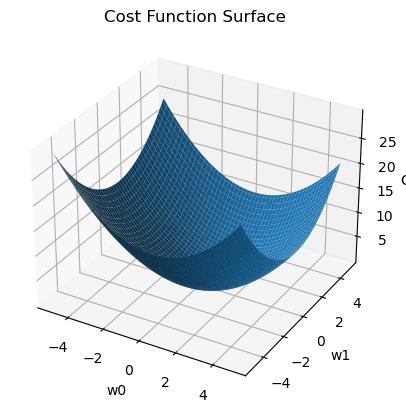

In [119]:
w0_vals = np.linspace(-5, 5, 100)
w1_vals = np.linspace(-5, 5, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)  # creating mesh grid of w0 and w1.
J_vals = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([w0_vals[i], w1_vals[j]])
        J_vals[i, j] = cost_function(X, w, y1)

        
# plotting the cost function surface.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_vals)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')
plt.show()


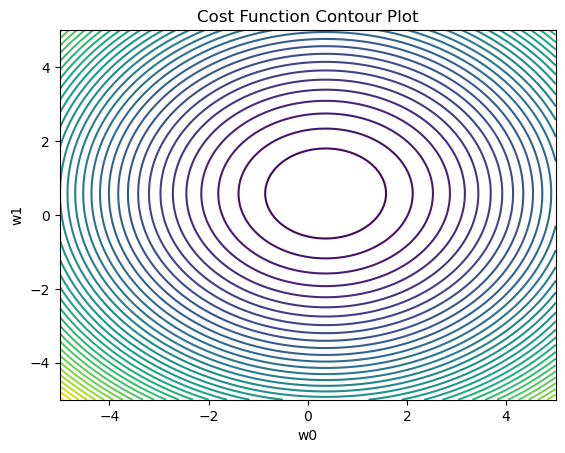

In [120]:
plt.contour(W0, W1, J_vals, levels= 40)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Cost Function Contour Plot')
plt.show()


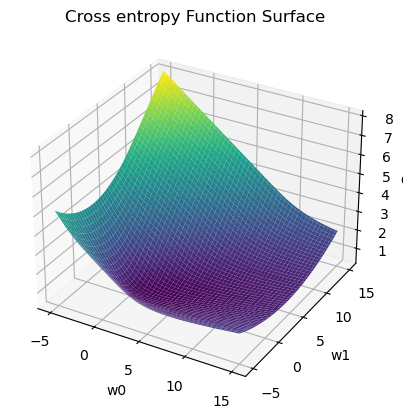

In [121]:
w0_vals = np.linspace(-5, 15, 100)
w1_vals = np.linspace(-5, 15, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)  # creating mesh grid of w0 and w1.
J_cross_entropy = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([w0_vals[i], w1_vals[j]])
        J_cross_entropy[i, j] = cross_entropy(X, w, y1)

        
# plotting the cost function surface.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_cross_entropy, cmap = 'viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cross entropy Function Surface')
plt.show()


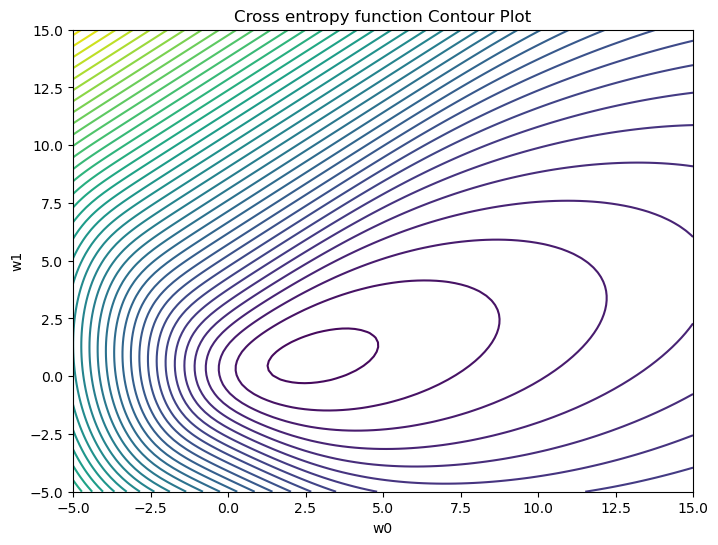

In [122]:

plt.figure(figsize = (8, 6))
plt.contour(W0, W1, J_cross_entropy, levels= 40)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Cross entropy function Contour Plot')
plt.show()

